In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

data_path = os.path.join('../data')
csvs_path = os.path.join('../results/csvs')

In [249]:
parking_data = pd.read_csv(os.path.join(data_path, 'IrvineSpectrumCenter_parking.csv'))
parking_data['time_bucket'] = pd.to_datetime(parking_data['time_bucket'])
parking_data['time_bucket'] = parking_data['time_bucket'].dt.tz_convert('US/Pacific')
X = pd.read_csv(os.path.join(csvs_path, 'correct_hotspot_distances.csv'))
X['timestamp'] = pd.to_datetime(X['timestamp'])

X.set_index('timestamp', inplace=True)
parking_data.set_index('time_bucket', inplace=True)

print('parking_data', parking_data.shape)
display(parking_data.head(1))

print('X', X.shape)
display(X.head(1))

parking_data (13912, 6)


,pk_lot,f_pct_occ,i_avail,i_occ,location,geometry
time_bucket,,,,,,
2023-01-01 00:21:00-08:00,90391,31.333333,356.666667,160.0,POINT(-117.859470364962 33.6809876250827),"MULTIPOLYGON(((-117.85839 33.68227,-117.85834 ..."


X (4464, 3)


,pk_lot,wasserstein,avg_hotspot_distance
timestamp,,,
2023-01-01 00:00:00-08:00,329825,0.744314,0.013144


In [250]:
lot_ids = list(X['pk_lot'].unique())
lot_ids

[329825, 375750, 380308, 381380, 381381, 387459]

In [266]:
lot_id = random.choice(lot_ids)
start_day = 1 #random.randint(1, 29)
end_day = start_day + 5 # random.randint(start_day + 1, min(30, start_day + 10))
start_time = pd.to_datetime(f'2023-01-{start_day} 00:00:00-08:00')
end_time = pd.to_datetime(f'2023-01-{end_day} 00:00:00-08:00')
print(f'getting data for lot {lot_id} from {start_time} to {end_time}')

getting data for lot 375750 from 2023-01-01 00:00:00-08:00 to 2023-01-06 00:00:00-08:00


In [267]:
# filter by lot
ground_truth_df = parking_data[parking_data['pk_lot'] == lot_id]
X_lot = X[X['pk_lot'] == lot_id].copy()

# wasserstein and avg_hotspot_distance usually between 0 and 1
X_lot['adjusted wasserstein'] = 100 * ((X_lot['wasserstein'] - X_lot['wasserstein'].min()) / (X_lot['wasserstein'].max() - X_lot['wasserstein'].min()))
X_lot['adjusted avg_hotspot_distance'] = 100 * ((X_lot['avg_hotspot_distance'] - X_lot['avg_hotspot_distance'].min()) / (X_lot['avg_hotspot_distance'].max() - X_lot['avg_hotspot_distance'].min()))

# filter by time
ground_truth_df = ground_truth_df[(ground_truth_df.index >= start_time) & (ground_truth_df.index <= end_time)]
X_lot = X_lot[(X_lot.index >= start_time) & (X_lot.index <= end_time)]
print(ground_truth_df.shape)
print(X_lot.shape)

(265, 6)
(121, 5)


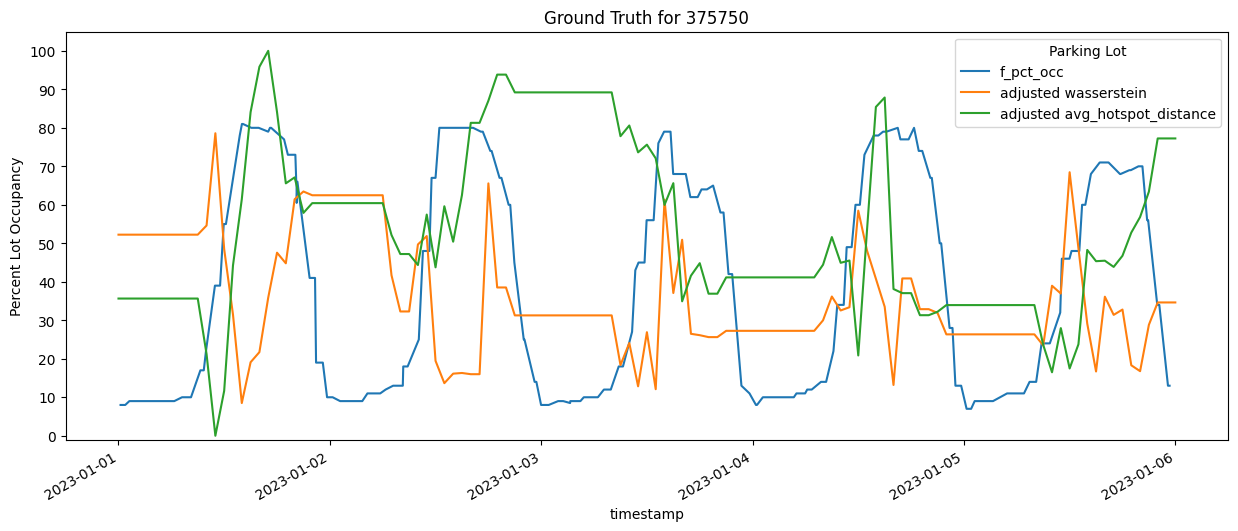

In [268]:
plt.figure(figsize=(15, 6))
ground_truth_df['f_pct_occ'].plot(legend=True)

# plot the wasserstein distance from X as well
X_lot['adjusted wasserstein'].plot(legend=True)

# plot the distance from hotspots
X_lot['adjusted avg_hotspot_distance'].plot(legend=True)

plt.yticks(np.arange(0, 110, 10))
plt.title(f'Ground Truth for {lot_id}')
plt.ylabel('Percent Lot Occupancy')
plt.legend(title='Parking Lot')
plt.ylim(-1, 105)
plt.show()